<a href="https://colab.research.google.com/github/AndreyBarTF/turbines_autumn_2022-Homework/blob/Kursach/%D0%9F%D1%83%D0%BD%D0%BA%D1%82_1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <h2 style="text-align: center;">НАЦИОНАЛЬНЫЙ ИССЛЕДОВАТЕЛЬСКИЙ УНИВЕРСИТЕТ</h2> 
# <h2 style="text-align: center;">МОСКОВСКИЙ ЭНЕРГЕТИЧЕСКИЙ ИНСТИТУТ</h2> 
# </br>
# <h3 style="text-align: center;">Кафедра Паровых и Газовых Турбин</h3>

# </br>
# </br>
# </br>
# </br>
# </br>

# <h1 style="text-align: center;">Курсовая работа по курсу:</h1>
# <h1 style="text-align: center;">«Паровые и газовые турбины»</h1>

# </br>
# </br>
# </br>
# </br>
# </br>

# <h5 style="text-align: right;">Студент: Барбашин Андрей Алексеевич</h5>
# <h5 style="text-align: right;">Группа: ТФэ-01-20</h5>

# </br>
# </br>
# </br>
# </br>
# </br>
# </br>
# </br>
# </br>
# </br>
# </br>
# </br>
# </br>
# </br>
# </br>
# </br>

# <h5 style="text-align: center;">Москва 2023</h5>





#  Вариант №1

#  $\space$ Дано:
# * Тип турбины: К-800-23,5 ЛМЗ
# * $P_0 = 25 \space МПа $ - Начальное давление
# * $t_0 = 560 ^\circ C$ -  Начальная температура
# * $P_{пп} = 3.62 \space МПа$ -  Давление промперегрева
# * $t_{пп} = 565 ^\circ C$ -  Температура промперегрева
# * $P_{к} = 3.5 \space кПа$ -  Давление в конденсаторе
# * $t_{п.в.} = 269^\circ C$ -  Температура питаталеьной воды

# * $N_{э} = 830 \space МВт$ -  Электрическая мощность
# * z = 9 -  Число отборов

# # 1. Построение процесса расширения пара в турбине.
# Определение расходов пара на входе в турбину $G_0$ и в конденсатор $G_к$.

In [1]:
!pip install iapws

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.9/111.9 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for iapws: filename=iapws-1.5.3-py3-none-any.whl size=114282 sha256=e80adaba21e5e7ce83a279323ec1f8e92297b0281d3f84dce929d8225b2fea09
  Stored in directory: /root/.cache/pip/wheels/4b/8f/d7/48fbfa9f897fcad5410a5c26a04ead1dfb131026e505bff24a
Successfully built iapws


In [2]:
!cp /content/drive/MyDrive/chast1.py /content

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import iapws
from iapws import IAPWS97 as gas
import chast1

In [4]:
MPa = 10 ** 6
kPa = 10 ** 3
unit = 1 / MPa
to_kelvin = lambda x: x + 273.15 if x else None

In [5]:
p_0 = 25 * MPa #Начальное давление
t_0 = 560 #Начальная температура
p_middle = 3.62 * MPa #Давление промперегрева
t_middle = 565 #Температура промперегрева
p_k = 3.5 * kPa #Давление в конденсаторе
t_feed_water = 269 #Температура питательной воды
electrical_power = 830 * (10 ** 6) #Электричесская мощность
z = 9 #Число отборов шт.
avg_diameter = 0.9# dр.с. = 0,9 - 1,1
rotation_speed = 50 #n
H_0 = 105
p_feed_water = 1.35 * p_0 #Давление питательной воды

internal_efficiency = 0.85
mechanical_efficiency = 0.994
generator_efficiency = 0.99

In [6]:
chast1.get_coeff(p_0, t_0, p_middle, t_middle, p_k, t_feed_water, electrical_power, p_feed_water, internal_efficiency, mechanical_efficiency,generator_efficiency)

Коэффициент для нахождения коэффициента для расчета кси 0.6972895391608839


0.6972895391608839

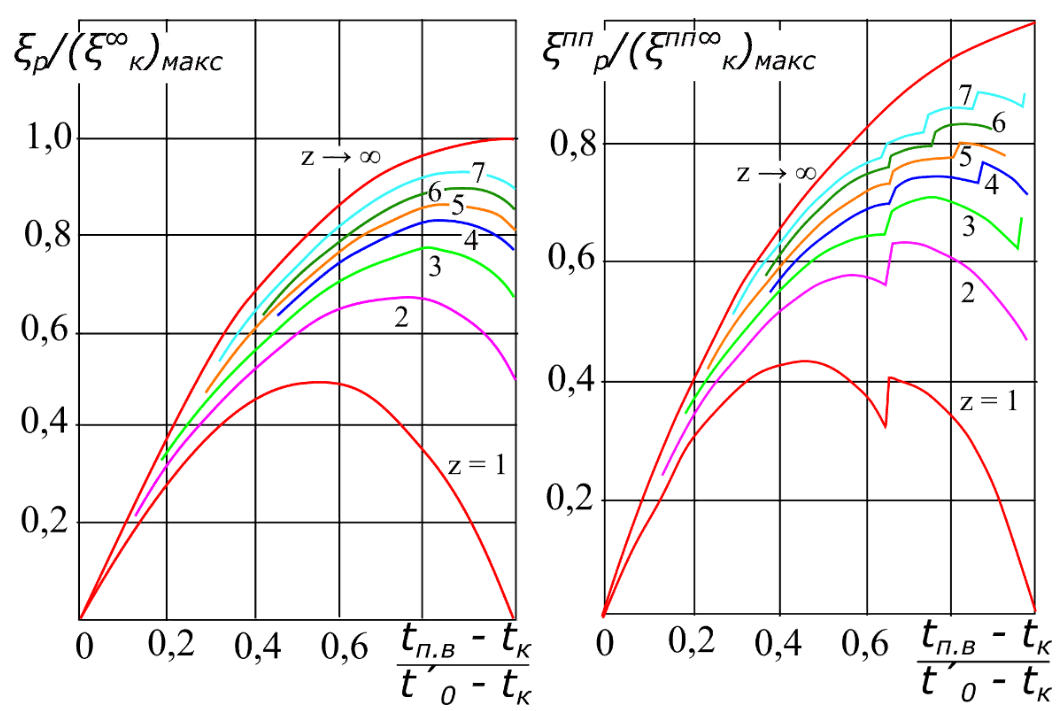

In [7]:
coef = chast1.coeff()

Введите коэффициент с графика 0.91


In [8]:
G_0 = chast1.get_inlet_mass_flow(p_0, t_0, p_middle, t_middle, p_k, t_feed_water, electrical_power, p_feed_water, internal_efficiency, mechanical_efficiency, generator_efficiency)
G_k = chast1.get_condenser_mass_flow(p_0, t_0, p_middle, t_middle, p_k, t_feed_water, electrical_power, p_feed_water, internal_efficiency, mechanical_efficiency, generator_efficiency)

print("Массовый расход в турбину на входе", G_0)
print("Массовый расход в конденсатор:", G_k)

Введите коэффициент с графика 0.91
Введите коэффициент с графика 0.91
Массовый расход в турбину на входе 638.9600679191188
Массовый расход в конденсатор: 423.53443370021046


In [9]:
_point_0, point_0, point_1t, hp_heat_drop, point_1, _point_middle, point_middle, lp_heat_drop, point_2, point_2t, point_k_water, point_feed_water = chast1.get_points(p_0, t_0, p_middle, t_middle, p_k, p_feed_water, t_feed_water, internal_efficiency)

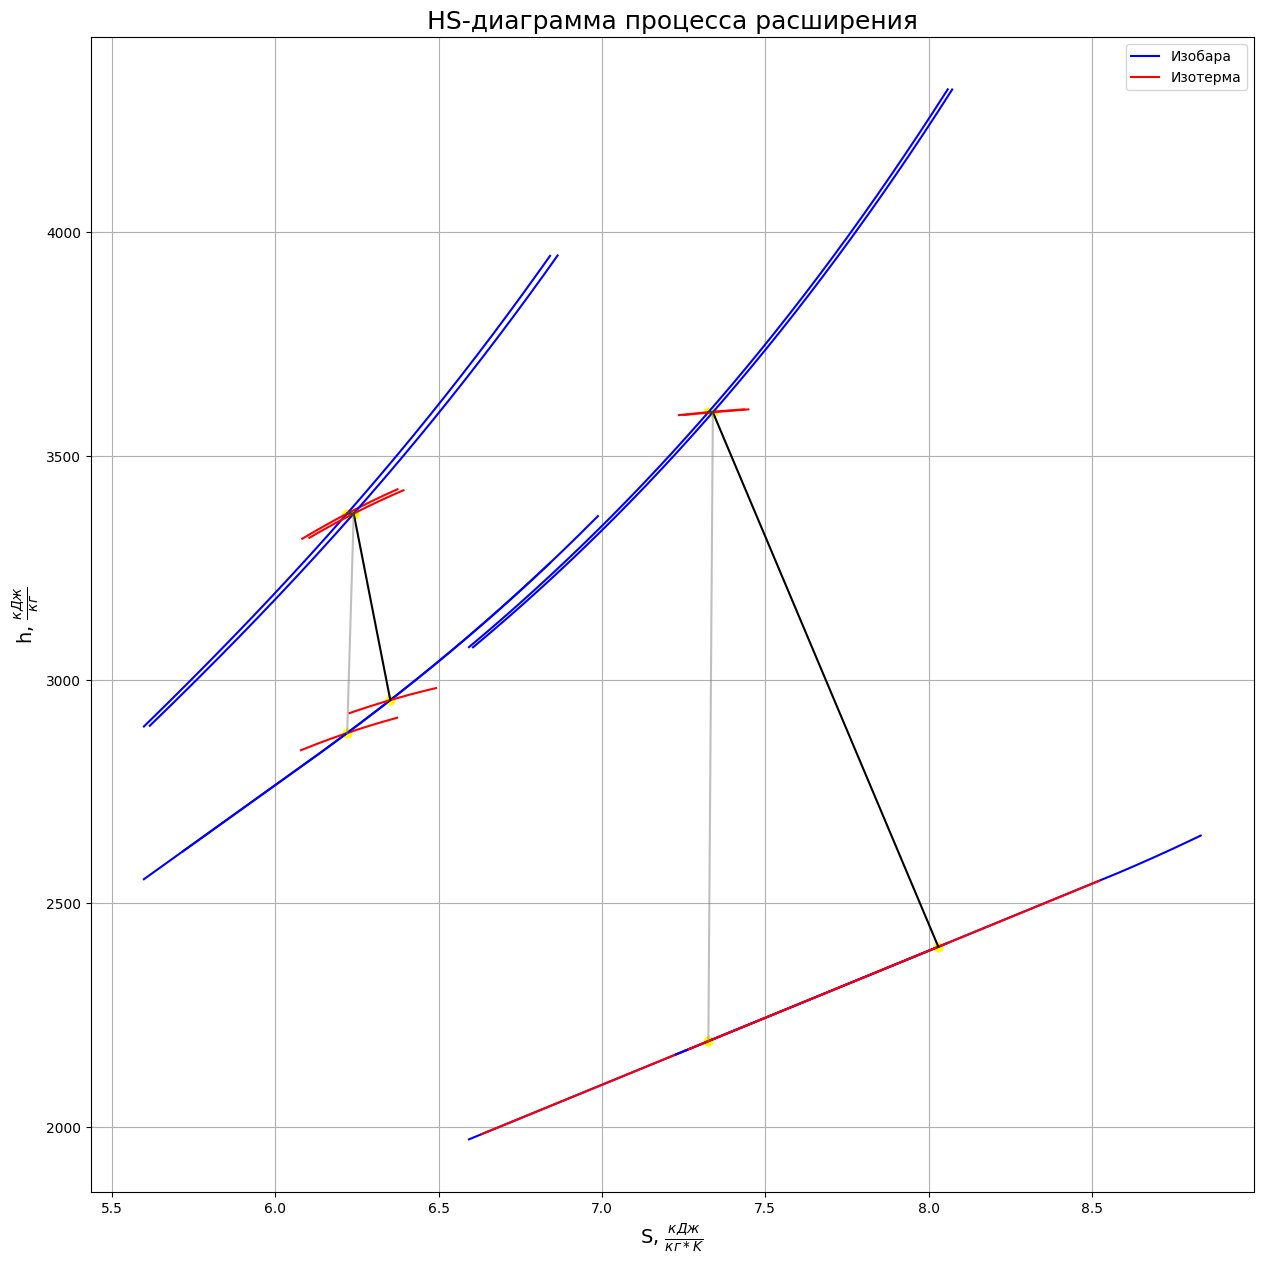

In [10]:
fig, ax = plt.subplots(1,1,figsize=(15,15))

chast1.plot_hs([_point_0, point_0, point_1t, point_1], ax = ax)
chast1.plot_hs([_point_middle, point_middle, point_2t, point_2], ax = ax)
chast1.plot_process([_point_0, point_0, point_1], ax = ax, color='black')
chast1.plot_process([_point_middle, point_middle, point_2], ax = ax, color='black')
chast1.plot_process([_point_0, point_0, point_1t], ax=ax, alpha=0.5, color='grey')
chast1.plot_process([_point_middle, point_middle, point_2t], ax=ax, alpha=0.5, color='grey')
ax.grid()

#2. Проведение расчета регулирующей ступени и определение зависимости ηол от U/cф. Диапазон варьируемого параметра для дан в задании. Обоснованно выбрать вариант исполнения регулирующей ступени для проектирования ЦВДв рамках заданного диапазона.


In [ ]:
data_output(*calculation_of_parameters_for_the_nozzle(H_0, G_0, point_0))

In [17]:
import pandas as pd 
import math as m
import numpy as np
ro = 0.05

def calculation_of_circumferential_speed(avg_diameter, rotation_speed):
  u = m.pi * avg_diameter * rotation_speed
  return u

#расчет параметров для выбора сопрловой решетки
def calculation_of_parameters_for_the_nozzle(H_0, G_0, point_0, ro):
  Ho_c = (1 - ro) * H_0
  Ho_p = H_0 * ro
  h1t = point_0.h - Ho_c
  c1t = m.sqrt(2 * Ho_c * 1000)
  point_1_t = gas(h = h1t, s = point_0.s)
  #k = 1.4
  #a1t = m.sqrt(k * (point_1_t.P * MPa) * point_1_t.v)
  a1t = point_1_t.w
  M1t = c1t / a1t
  mu1 = 0.97
  F1_ = (G_0 * point_1_t.v) / (mu1 * c1t)
  return Ho_c, Ho_p, h1t, c1t, a1t, M1t, F1_

def data_output(Ho_c, Ho_p, h1t, c1t, a1t, M1t, F1_):
  d = {
     'Parameters': ["Ho_c", "Ho_p", "h1t", "c1t", "a1t", "M1t", "F1_"],
    'Value': [Ho_c, Ho_p, h1t, c1t, a1t, M1t, F1_]
  }
  df = pd.DataFrame(data=d)
  print(df)

#параметры выбранной сопловой решетки С-90-15А
def selection_of_the_nozzle_grating_profile():
  alpha0 = 90
  alpha1_e = 15
  t_opt = range(0.70,0.85,0.01)
  M1t_ = 0.85
  b1 = 51.5
  f1 = 3.3
  I1_min = 0.36
  W1_min = 0.45
  return alpha1_e,alpha0, t_opt, M1t_, b1, f1, I1_min ,W1_min

#определение дополнительных параметров сопловой решетки С-90-15А
def Clarification_nozzle_grating(F1_, avg_diameter, alpha1_e, b1, point_1_t):
  el1 = F1_ / (m.pi * avg_diameter * m.sin(m.radians(alpha1_e)))
  e_opt = 4 * m.sqrt(el1)
  if e_opt > 0.85:
    e_opt = 0.85
  l1 = el1 / e_opt
  mu1 = 0.982 - 0.005 * ((b1 * 10e-3) / l1)
  F1 = (G_0 * point_1_t.v) / (mu1 * c1t)
  t1opt_ = 0.75
  z1 = (m.pi * avg_diameter * e_opt) / (b1 * 10e-3  * t1opt_)  
  z_1 = round(z1+0.5)-1 if (round(z1) % 2) else round(z1+0.5)
  t1opt = (m.pi * avg_diameter * e_opt) / (b1 * 10e-3  * z_1)
  return el1, e_opt, l1, mu1, F1, z_1, t1opt


#параметры сопловой решетки С-90-15А из атласа
def Clarification_other_nozzle_grating_parameters(alpha1_e, t1opt, l1, b1):
  alpha_ust = alpha1_e - 16 * (t1opt - 0.75) + 23.1

#определение потерь не доделано 
  ksi_noz = 1.98 * 10e-2 #коэфф профильных потерь
  ksi_c = 2*10**-2
  b1_l1 = b1 * 10e-3 / l1
  
  ksi_sum_noz = 1.98 * 10e-2 #коэфф профильных потерь суммарный
  ksi_end_noz = ksi_sum_noz + ksi_c
  ksi_c = 12

  
  fi = m.sqrt(1 - (ksi_c / 100)) #Коэффициент скорости сопловой решетки φ  
  fi_ = 0.98 - 0.008 * (b1 / l1) #Проверяем коэффициент скорости сопловой решетки φ'  
  delta = (fi - fi_) / fi #Находим расхождение между φ и φ'  
  c_1 = c1t * fi #Скорость выхода пара из сопловой решетки с1  
  alpha1 = m.asin((mu1/fi)* m.sin(alpha1_e)) #Угол alpha1 вектора скорости с1
  return c_1, alpha1



data_output(*calculation_of_parameters_for_the_nozzle(H_0, G_0, point_0, ro))

#расчет параметров для выбора рабочей решетки
def calculation_of_parameters_for_the_selection_of_the_working_grid(c_1, c_1t, alpha1, u, point_1_t, Ho_p):
  w_1 = m.sqrt(c_1 ** 2 + u ** 2 - 2 * c_1 * u * m.cos(alpha1))
  beta_1 = m.degrees(m.atan(m.sin(alpha1) / (m.cos(alpha1) - u / c_1)))
  delta_Hc = c_1t ** 2 / (2 * (1 - fi **2))
  h1 = h1t + delta_Hc
  point_1_ = gas(h = h1, P = point_1_t.P)
  h2t = h1 - Ho_p #???
  point_2_t = gas(s = point_1_.s, h = h2t)
  w2t = m.sqrt(2 * Ho_p + w_1 ** 2)
  delta = 0.004
  l2 = l1 + delta
  mu2 = 0.965 - 0.01 * (b2 / l2)
  k2 = 1.3
  a2t = m.sqrt(k2 * (point_2_t.P * MPa) * point_2_t.v)
  M2t = w2t / a2t
  return w_1, beta_1



#функция для посторения треугольников скоростей 
def construction_of_velocity_triangles(u, w_1, c_1, w_2, c_2, alpha_1, beta_2):
  sin_alpha_1 = m.sin(m.radians(alpha_1))
  cos_alpha_1 = m.cos(m.radians(alpha_1))
  sin_beta_2 = m.sin(m.radians(beta_2))
  cos_beta_2 = m.cos(m.radians(beta_2))

  c1_plot = [[0, -c_1 * cos_alpha_1], [0, -c_1 * sin_alpha_1]]
  u1_plot = [[-c_1 * cos_alpha_1, -c_1 * cos_alpha_1 + u], [-c_1 * sin_alpha_1, -c_1 * sin_alpha_1]]
  w1_plot = [[0, -c_1 * cos_alpha_1 + u], [0, -c_1 * sin_alpha_1]]
  w2_plot = [[0, w_2 * cos_beta_2], [0, -w_2 * sin_beta_2]]
  u2_plot = [[w_2 * cos_beta_2, w_2 * cos_beta_2 - u], [-w_2 * sin_beta_2, -w_2 * sin_beta_2]]
  c2_plot = [[0, w_2 * cos_beta_2 - u], [0, -w_2 * sin_beta_2]]

  fig, ax = plt.subplots(1, 1, figsize=(15, 5))
  ax.plot(c1_plot[0], c1_plot[1], label='C_1', c='red')
  ax.plot(u1_plot[0], u1_plot[1], label='u_1', c='blue')
  ax.plot(w1_plot[0], w1_plot[1], label='W_1', c='green') 
  ax.plot(w2_plot[0], w2_plot[1], label='W_2', c='green')
  ax.plot(u2_plot[0], u2_plot[1], label='u_2', c='blue')
  ax.plot(c2_plot[0], c2_plot[1], label='C_2', c='red')
  ax.set_title("Треугольник скоростей",)
  ax.legend()
  ax.grid();

def calculation_of_the_velocity_ratio(u, H_0, fi, alpha1, ro):
  cf = m.sqrt(2 * H_0 * 1000)
  u_cf = u / cf
  u_cf_opt = (fi * m.cos(alpha1)) / (2 * m.sqrt(1 - ro))
  return cf, u_cf, u_cf_opt


  Parameters        Value
0       Ho_c    99.750000
1       Ho_p     5.250000
2        h1t  3271.543152
3        c1t   446.654229
4        a1t   624.733110
5        M1t     0.714952
6        F1_     0.025853


In [14]:
import math as m
import numpy as np

#окружная скорость на среднем диаметре u
u = m.pi * avg_diameter * rotation_speed
print("u=",u)
#степень реактивности
ro = 0.05 #степень реактивности принять в диапазоне 0,05-0,1
#Изоэнтропийный теплоперепад сопловой решетки по параметрам торможения
Hoc = (1 - ro) * H_0
print("Hoc=",Hoc)
#Изоэнтропийный теплоперепад в рабочей решетке по статическим параметрам
Hop = H_0 * ro
#Теоретическая энтальпия за сопловой решеткой
print("ho=",point_0.h)
h1t = point_0.h - Hoc
print("h1t=",h1t)
#Теоретическая скорость выхода из сопловых лопаток
c1t = m.sqrt(2 * Hoc * 1000)
print("c1t=",c1t)
#Скорость звука за сопловой решеткой (теоретическая)
k = 1.380649 
print("s=",point_0.s)
p1 = gas(h = h1t, s = point_0.s)
print("p1=",p1.P)
v1t = gas(h = h1t, s = point_0.s)
print("v1t=",v1t.v)
a1t = m.sqrt(k * (p1.P * MPa) * v1t.v)
print("a1t=",a1t)
#Число Маха по скорости c1t
M1t = c1t / a1t
print("число маха  M1t=", M1t)
#Выходная площадь сопловой решетки (предварительная) 
mu1 = 0.97
F1 = (G_0 * v1t.v) / (mu1 * c1t)
alfa1_e = 10 #Угол α1э направления скорости с1t, град Принимаем в диапазоне α1э=10-16
#Произведение el1
el1 = F1 / (m.pi * avg_diameter * m.sin(m.radians(alfa1_e)))
#Оптимальное значение степени парциальности eопт
e_opt = 4 * m.sqrt(el1) #так как получилось больше 0,85 принимаем e_opt = 0.85
print("e_opt=",e_opt)
e_opt = 0.85
#Высота сопловых лопаток 𝑙1
l1 = el1 / e_opt
#
b1 = 51.5 
#Уточняем коэффициент расхода сопловой решетки
mu1 = 0.982 - 0.005 * (b1 * 10e-3 / l1)
#Количество лопаток в сопловой решетке z1
t1opt = 0.72
z1 = (m.pi * avg_diameter * e_opt) / (b1 * 10e-3  * t1opt) #???
print(z1)
z1 = 65
#После округления z1 уточним относительный шаг
t1 = (m.pi * avg_diameter * e_opt) / (b1 * 10e-3  *z1)
t1
#Угол установки лопатки в сопловой решетке αуст
alfa_ust = 10
#Коэффициент потерь в сопловой решетке ζс
ksi_c = 12
#Коэффициент скорости сопловой решетки φ
fi = m.sqrt(1 - (ksi_c / 100))
#Проверяем коэффициент скорости сопловой решетки φ'
fi_ = 0.98 - 0.008 * (b1 / l1)
#Находим расхождение между φ и φ'
delta = (fi - fi_) / fi
#Скорость выхода пара из сопловой решетки с1
c1 = c1t * fi
#Угол alfa1 вектора скорости с1
alfa1 = m.asin((mu1/fi)* m.sin(alfa1_e))



u= 141.3716694115407
Hoc= 99.75
ho= 3371.2931516471426
h1t= 3271.5431516471426
c1t= 446.65422868254586
s= 6.2404044342528495
p1= 17.289439813062152
v1t= 0.017530205802841623
a1t= 646.8828088447923
число маха  M1t= 0.6904716319176637
e_opt= 0.9178832807644609
6.481441154250786
